<a href="https://colab.research.google.com/github/vishnucanada/DataScienceProject/blob/main/process_airplane_delay_file.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Notebook will pre process data by combining likewise features, and removing irrelevant features, and then will map the data


Imports Required


In [79]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from google.colab import drive
from sklearn.linear_model import LinearRegression


In [69]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
temp_df = pd.read_csv('/content/drive/MyDrive/data/raw/DelayedFlights.csv')

In [4]:
df_delays = temp_df.copy()


In [5]:
df_delays.head(5)

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [6]:
df_delays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [7]:
df_delays.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
df_delays.isnull().sum()


Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [9]:
#what percent of data is null for WeatherDelay (our target)
(df_delays['WeatherDelay'].isnull().sum() / len(df_delays)) * 100

35.588855189961784

In [10]:
#That is a big amount of data missing
df_delays['WeatherDelay']

0           NaN
1           NaN
2           NaN
3           0.0
4           NaN
           ... 
1936753     0.0
1936754    57.0
1936755     0.0
1936756     NaN
1936757     NaN
Name: WeatherDelay, Length: 1936758, dtype: float64

In [11]:
df_delays['WeatherDelay'].max()

1352.0

In [12]:
df_delays['WeatherDelay'].min()

0.0

Realistically we only care for a Binary Classification (True or False) if there was a weather delay so lets modify the data Weather Delay or Not Weather Delay


In [13]:
dates = df_delays['Year'].astype(str) + '-' + df_delays['Month'].astype(str) + '-' + df_delays['DayofMonth'].astype(str) + '-' + df_delays['DayOfWeek'].astype(str)


In [14]:
df_delays['Date'] = dates
df_delays = df_delays.drop(['Year', 'Month', 'DayofMonth', 'DayOfWeek'], axis=1)
df_delays


,Unnamed: 0,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,0,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,...,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
1,1,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
2,2,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,...,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,...,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-1-3-4
4,5,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,...,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,7009710,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,...,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,2008-12-13-6
1936754,7009717,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,...,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,2008-12-13-6
1936755,7009718,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,...,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0,2008-12-13-6
1936756,7009726,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,...,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN,2008-12-13-6


Theres alot of delays within this DataSet that are not weather Delay, NASDelay, Security Delay, Airplane Delay, So we should inspect that

In [15]:
count_delays = (df_delays['WeatherDelay'] > 0) & ((df_delays['CarrierDelay'] > 0) | (df_delays['NASDelay'] > 0) | (df_delays['SecurityDelay'] > 0) | (df_delays['LateAircraftDelay'] > 0))
(count_delays.sum()/len(df_delays['WeatherDelay'] > 0)) * 100

4.001584090526539

Essentially 4% of the Delays from Weather are accompanied with other delays of Security, Airplane and ect...


In [16]:
((df_delays['Cancelled'] > 0) & (df_delays['WeatherDelay'] > 0)).sum()


0

Cancelled and Weather Delay are mutually Exclusive (never both True) so we can drop this feature

In [17]:
df_delays = df_delays.drop(['Cancelled'],axis=1)

### Lets Do Some EDA


In [18]:
from scipy.stats import entropy

import numpy as np

In [19]:
target_entropy = entropy(df_delays['WeatherDelay'].value_counts(normalize=True))


In [20]:
target_entropy

0.6558634950492173

Within the context of Entropy 0, means we are absolutley certain while 1 means 100% random


In [21]:
def entropy(series):
    # Calculate entropy of a given series
    probabilities = series.value_counts(normalize=True)
    return -np.sum(probabilities * np.log2(probabilities))

def information_gain(df, target_column, feature_column):
    total_entropy = entropy(df[target_column])
    feature_grouped = df.groupby(feature_column)[target_column].apply(entropy)
    weighted_entropy = np.sum(df[feature_column].value_counts(normalize=True) * feature_grouped)
    return total_entropy - weighted_entropy

def get_information_gain_of_all(df, target_column,columns):
    information_gains = {}
    for column in columns:
      information_gains[column] = information_gain(df, target_column, column)
      print(f'Col: {column} information gain {information_gains[column]}')
    return information_gains

In [22]:
cols = df_delays.columns
cols


Index(['Unnamed: 0', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Date'],
      dtype='object')

In [23]:
data = get_information_gain_of_all(df_delays,'WeatherDelay',['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest',
       'Distance', 'TaxiIn', 'TaxiOut', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'Date'])

Col: DepTime information gain 0.12756455987959503
Col: CRSDepTime information gain 0.07273672481161031
Col: ArrTime information gain 0.11909671705376346
Col: CRSArrTime information gain 0.09505940674140156
Col: UniqueCarrier information gain 0.0578112158330486
Col: FlightNum information gain 0.2642085295017781
Col: TailNum information gain 0.2500302204748911
Col: ActualElapsedTime information gain 0.0513839755327864
Col: CRSElapsedTime information gain 0.04469238474770021
Col: AirTime information gain 0.04234803090378092
Col: ArrDelay information gain 0.43666295004469335
Col: DepDelay information gain 0.30147855557713754
Col: Origin information gain 0.0686202396728195
Col: Dest information gain 0.04654452992502589
Col: Distance information gain 0.11988330463126162
Col: TaxiIn information gain 0.012954274539991095
Col: TaxiOut information gain 0.08658174253692785
Col: CancellationCode information gain 0.0003092547290235448
Col: Diverted information gain 0.003788248292020069
Col: Carrier

In [24]:
dict_info = dict(sorted(data.items(),key=lambda item: item[1]))
dict_info


{'CancellationCode': 0.0003092547290235448,
 'SecurityDelay': 0.0005944798512484972,
 'Diverted': 0.003788248292020069,
 'TaxiIn': 0.012954274539991095,
 'NASDelay': 0.023316599023738505,
 'LateAircraftDelay': 0.041899815695343956,
 'AirTime': 0.04234803090378092,
 'CRSElapsedTime': 0.04469238474770021,
 'Dest': 0.04654452992502589,
 'ActualElapsedTime': 0.0513839755327864,
 'UniqueCarrier': 0.0578112158330486,
 'Origin': 0.0686202396728195,
 'CarrierDelay': 0.0712934912051103,
 'CRSDepTime': 0.07273672481161031,
 'TaxiOut': 0.08658174253692785,
 'CRSArrTime': 0.09505940674140156,
 'Date': 0.10027513604331251,
 'ArrTime': 0.11909671705376346,
 'Distance': 0.11988330463126162,
 'DepTime': 0.12756455987959503,
 'TailNum': 0.2500302204748911,
 'FlightNum': 0.2642085295017781,
 'DepDelay': 0.30147855557713754,
 'ArrDelay': 0.43666295004469335,
 'WeatherDelay': 0.9462110118076089}

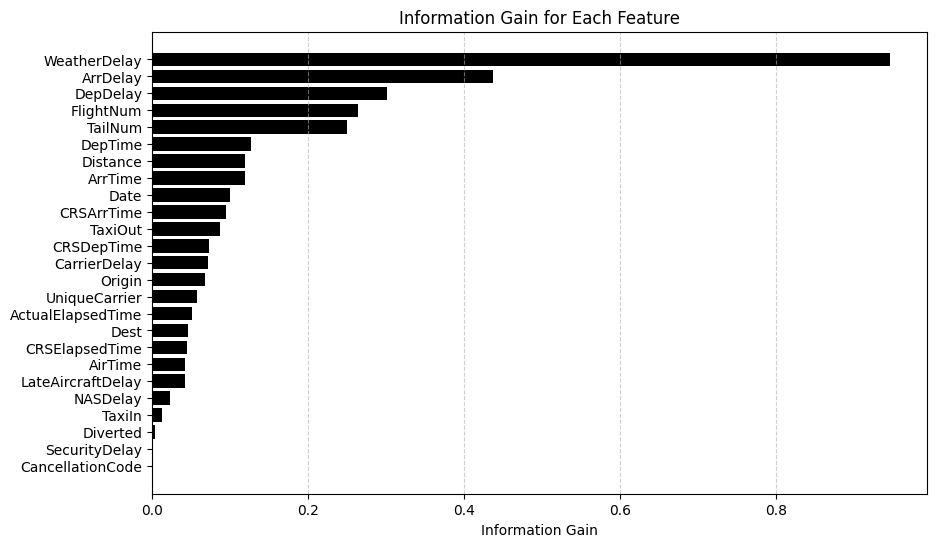

In [26]:
features = list(dict_info.keys())
values = list(dict_info.values())

plt.figure(figsize=(10, 6))
plt.barh(features, values, color='black')
plt.xlabel('Information Gain')
plt.title('Information Gain for Each Feature')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

Let us Interperet the data from above, keep in my mind information gain is largely used for Decision Trees but the theory is apart of Information Theory such that we have valuable insights


Let us build a Correlation Matrix

<ipython-input-39-970d45753a5d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_delays.corr()


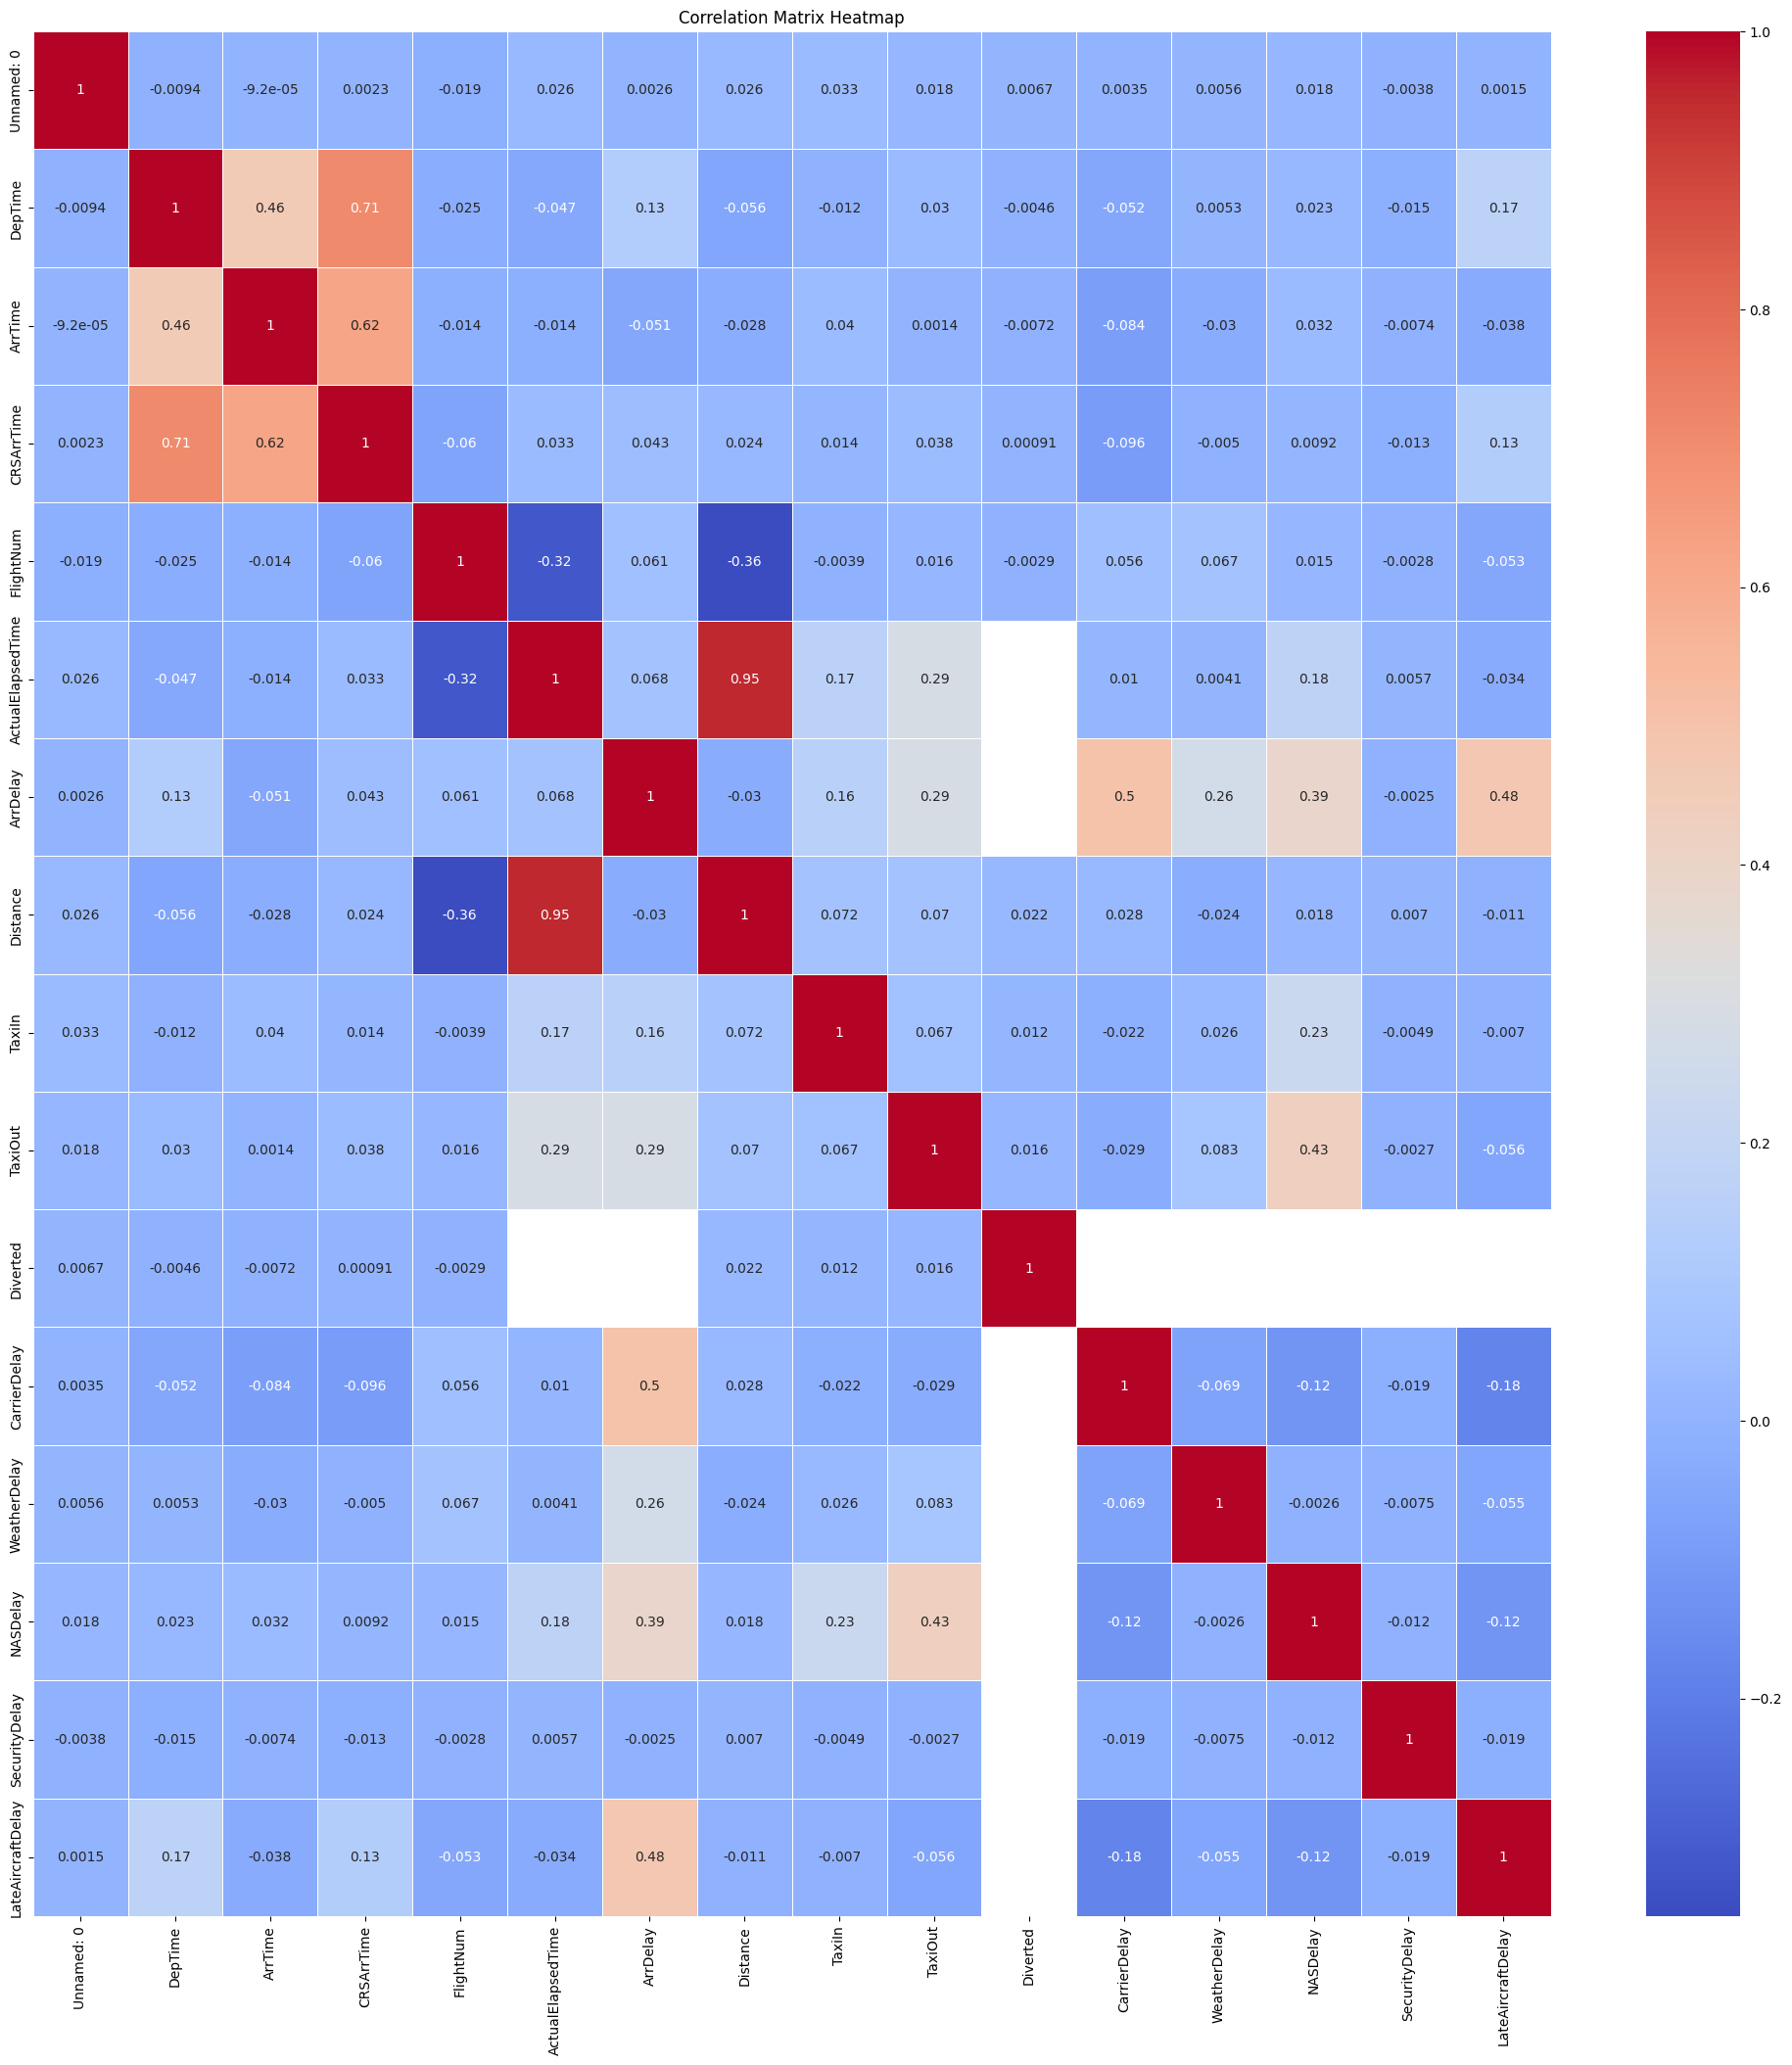

In [39]:
correlation_matrix = df_delays.corr()

# Plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

We are Going to set our Correlation threshold is 0.8

In [40]:
correlation_threshold = 0.8
def corr_matrix(correlation_matrix,correlation_threshold):
  high_correlation_pairs = []
  for i in range(len(correlation_matrix.columns)):
      for j in range(i + 1, len(correlation_matrix.columns)):
          if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
              pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
              high_correlation_pairs.append(pair)
  return high_correlation_pairs
high_correlation_pairs = corr_matrix(correlation_matrix=correlation_matrix,correlation_threshold=correlation_threshold)
print(f"Pairs with correlation above {correlation_threshold}:")
for pair in high_correlation_pairs:
    print(pair)

Pairs with correlation above 0.8:
('ActualElapsedTime', 'Distance')


Let us interperet our data, DepTime and CRSDepTime, CRS time is when passengers must be checked in so there is a high correlation

Furthermore we see that Actual Elapsed Time is highly correlated with distance. Which logically makes sense more time spent in the air is highly correlated to distance.

In [41]:
to_drop = ['CRSDepTime','CRSElapsedTime','CRSArrTime','AirTime','DepDelay','ActualElapsedTime']

We should drop these attributes since it adds complexity to our eventual model and are redundant
`

In [48]:
#df_delays = df_delays.drop(to_drop, axis=1)
df_delays = df_delays.drop('CRSArrTime',axis=1)

In [53]:
df_delays['CancellationCode'].unique()

array(['N', 'A', 'B', 'C'], dtype=object)

In [54]:
df_delays.head()

,Unnamed: 0,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,ArrDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,0,2003.0,2211.0,WN,335,N712SW,-14.0,IAD,TPA,810,4.0,8.0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
1,1,754.0,1002.0,WN,3231,N772SW,2.0,IAD,TPA,810,5.0,10.0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
2,2,628.0,804.0,WN,448,N428WN,14.0,IND,BWI,515,3.0,17.0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4
3,4,1829.0,1959.0,WN,3920,N464WN,34.0,IND,BWI,515,3.0,10.0,N,0,2.0,0.0,0.0,0.0,32.0,2008-1-3-4
4,5,1940.0,2121.0,WN,378,N726SW,11.0,IND,JAX,688,4.0,10.0,N,0,NaN,NaN,NaN,NaN,NaN,2008-1-3-4


In [57]:
df_delays['FlightNum'].unique()

array([ 335, 3231,  448, ..., 6869, 6870, 5272])

Certain Features seem unecessary, so we remove them

In [58]:
unecessary_features = ['CancellationCode','FlightNum']
df_delays = df_delays.drop(unecessary_features, axis=1)


In [ ]:
#Now lets do some imputation on NULL Values

In [67]:
df_delays.isnull().sum()

Unnamed: 0                0
DepTime                   0
ArrTime                   0
UniqueCarrier             0
TailNum                   0
ArrDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Diverted                  0
CarrierDelay         680882
WeatherDelay         680882
NASDelay             680882
SecurityDelay        680882
LateAircraftDelay    680882
Date                      0
dtype: int64

In [66]:
df_delays = df_delays.dropna(subset=['TailNum','ArrTime','ArrDelay'])
df_delays.isnull().sum()


In [78]:
df_delays['CarrierDelay'].isnull().sum()/len(df_delays)

0.3530871700837185

35% of Data is Null, if we use Mean we will inaccuratley interperet our data, so we will use Model Based Imputation Technique

In [70]:
df_delays['CarrierDelay'].describe()

count   1247486
mean         19
std          44
min           0
25%           0
50%           2
75%          21
max        2436
Name: CarrierDelay, dtype: float64

In [83]:
col = df_delays.columns[df_delays.isnull().any()].tolist()
col


['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

We are using Model Based Imputation Technique

In [1]:
def model_imputation(df=df_delays,columns_with_missing_values=col):
   # Separate the DataFrame into two parts: one with missing values and one without
    for column in columns_with_missing_values:
      df_missing = df[df[column].isnull()]
      df_not_missing = df.dropna(subset=[column])

      # Identify categorical columns for one-hot encoding
      categorical_columns = df_not_missing.select_dtypes(include=['object']).columns

      # One-hot encode categorical columns
      df_not_missing_encoded = pd.get_dummies(df_not_missing, columns=categorical_columns, drop_first=True)

      # Split the data into features (X) and target variable (y) for training
      X_train = df_not_missing_encoded.drop([column], axis=1)
      y_train = df_not_missing_encoded[column]

      # Train a linear regression model
      model = LinearRegression()
      model.fit(X_train, y_train)

      # One-hot encode missing data
      df_missing_encoded = pd.get_dummies(df_missing, columns=categorical_columns, drop_first=True)

      # Predict missing values using the trained model
      X_missing = df_missing_encoded.drop([column], axis=1)
      predicted_values = model.predict(X_missing)

      # Replace missing values with predicted values
      df.loc[df[column].isnull(), column] = predicted_values

    return df

NameError: ignored

In [ ]:
new_df_after_model = model_imputation(df_delays,col)

In [ ]:
X = df.dropna(subset=['your_column']).drop('your_column', axis=1)
y = df.dropna(subset=['your_column'])['your_column']

model = LinearRegression()
model.fit(X, y)

df.loc[df['your_column'].isnull(), 'your_column'] = model.predict(df.drop('your_column', axis=1))